<a href="https://colab.research.google.com/github/basketbob/ML/blob/main/netology_DS/mds24_hw7_KuzinVS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

При фиксированном seed=42 поэкспериментируйте с параметрами алгоритма differential_evolution: strategy, popsize, mutation.

In [ ]:
# Испробовал все параметры strategy, самый эффективный best1bin
# popsize - 0, 1, 2 имеют одинаковое низкое значение, дальше чем больше число, тем больше результаты.
result = differential_evolution(ackley, bounds, seed=42, strategy='best1bin', popsize=1, mutation=0.0001)
result

     fun: 3.339370113764062e-09
     jac: array([2.394696  , 2.18475478])
 message: 'Optimization terminated successfully.'
    nfev: 169
     nit: 1
 success: True
       x: array([-4.16298692e-10, -1.10481603e-09])

Постройте графики количества итераций (nit) оптимизации функции ackley от значения параметра.

[1, 4, 5, 5, 10, 10, 10, 10, 41, 34, 10, 13, 18, 31, 46, 47, 47, 22, 27, 55]


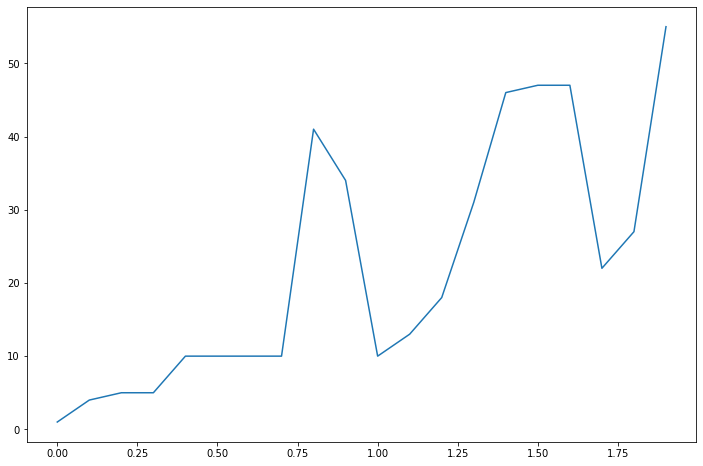

In [ ]:
nits = []
mutations = np.arange(0, 2, 0.1)

for mut in mutations:
  try:
    res = differential_evolution(ackley, bounds, seed=42, strategy='best1bin', popsize=1, mutation=mut)
    nits.append(res['nit'])
  except ValueError:
    mutations.remove(mut)

print(nits)

plt.figure(figsize=(12, 8))
plt.plot(mutations, nits)
plt.show()

Дополнительное задание
Поэкспериментируйте с параметрами и оптимизацией через minimize:

In [ ]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0,  method='COBYLA') #COBYLA - самый эффективный метод
result_m

     fun: 0.00028310899612238316
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 25
  status: 1
 success: True
       x: array([-8.76258342e-06,  9.96153459e-05])